# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
     </ol>
</ol>

In [271]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time
import multiprocessing

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D


import scipy as sp
from scipy import stats
from mca import *
from scipy.stats import boxcox
import hdbscan


%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML

import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.graph_objs import *
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
# tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
# tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

In [272]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

<h2>1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>

In [273]:
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1215
uninfected    1215
Name: Target, dtype: int64

### Feature Set

In [274]:
X=z.iloc[:,z.columns!='Target']

In [275]:
target=z.Target.reset_index(drop=True)

In [276]:
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [277]:
X.head(2)

Number of Records  \
Source_User                                                             
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...               3143   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...               4033   

                                                    Average Size of Packets Received  \
Source_User                                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                         47.552339   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                         82.857426   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                     27.085905   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                     44.838334   

                                                    Average Elapsed Time  \
Source_User                                                                
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...             96.415845   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...             57.419043   

                                                    Average number of Bytes sent  \
Source_User                                                                        
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                   4585.223353   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                   6043.387801   

                                                    Average number of Bytes received  \
Source_User                                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                      53140.855234   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                     103659.874039   

                                                    Number of different Source Ports  \
Source_User                                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                            3003.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                            3538.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                                   14.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                                   18.0   

                                                    Number of different Applications  \
Source_User                                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                                37   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                                37   

                                                    Number of different Source IP  \
Source_User                                                                         
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                             21   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                             26   

                                                    Number of different Destination IP  \
Source_User                                                                              
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                                 906   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...                                 566   

                                                    Average differnce in Received Time  \
Source_User                                                                              
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...                          851.246898   
4b29c98096a7c939ec34381

### Scaled X

In [278]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [279]:
scaled_X[0:2]

array([[ 1.06028887, -0.35042932, -0.28894052, -0.07456502, -0.15219093,
        -0.36118366,  1.36690381, -0.07282103,  0.78322428, -0.31769309,
         1.47624051, -0.31185609,  1.34277387,  0.34610434,  0.17323505,
        -0.18262473, -0.17349686, -0.33989034, -0.25419061,  0.12209952,
         1.52233459,  6.04812822,  1.94851836,  1.9576404 ,  1.9519024 ,
         0.69740139,  1.58469242,  0.23442274,  0.86577867,  0.45728171,
         1.55957793,  0.83789871,  0.22652109,  0.42299511,  2.10767541,
         0.71395095],
       [ 1.59551457, -0.21046479, -0.17664553, -0.54343507, -0.13228886,
        -0.19367014,  1.78261845, -0.03682162,  0.78322428, -0.01842413,
         0.54583257, -0.31820477,  2.10893217,  2.65035595,  0.16603938,
         1.44455904,  0.8444056 ,  0.98488711,  0.58468849,  0.34288034,
         1.09066454,  3.3458291 ,  1.65404004,  0.40994993,  2.86557885,
         0.27083844,  1.48574476, -0.10467223,  0.36971483,  0.49266613,
         0.32680024,  1.12225

In [280]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

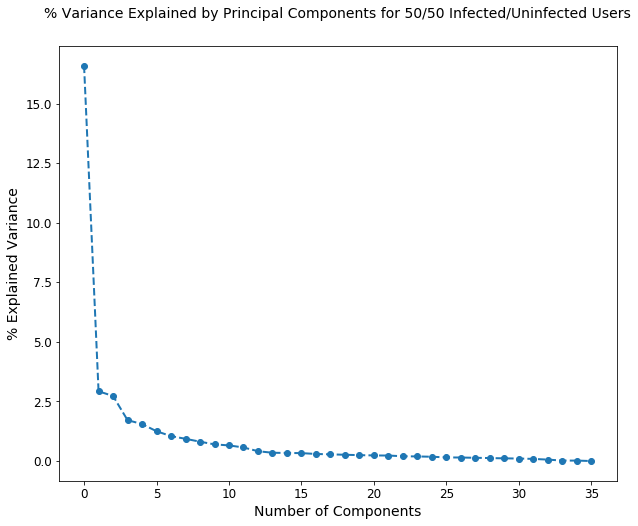

In [281]:
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50/50 Infected/Uninfected Users',size=14,y=1.05)
plt.show()


In [282]:
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 16.59899 		 0
2 		 2.9285 		 82.3573786755
3 		 2.73097 		 6.74499114248
4 		 1.71696 		 37.1300649917
5 		 1.55257 		 9.5746839342
6 		 1.25135 		 19.4009114912
7 		 1.04561 		 16.4419758376
8 		 0.9331 		 10.7595774402
9 		 0.81158 		 13.0237572598
10 		 0.69933 		 13.8314971339
11 		 0.65581 		 6.22177727746
12 		 0.56997 		 13.0892325274
13 		 0.41235 		 27.6553574931
14 		 0.34735 		 15.7627626088
15 		 0.33848 		 2.55255371815
16 		 0.33222 		 1.8507419469
17 		 0.29653 		 10.743201227
18 		 0.2807 		 5.33661155124
19 		 0.26303 		 6.29475084499
20 		 0.24746 		 5.91982057722
21 		 0.23515 		 4.97477334978
22 		 0.23001 		 2.18534138396
23 		 0.20122 		 12.5165836112
24 		 0.19229 		 4.43782813821
25 		 0.17996 		 6.41395392238
26 		 0.15229 		 15.3763580937
27 		 0.14686 		 3.56497973355
28 		 0.1364 		 7.11946655926
29 		 0.12455 		 8.69322382664
30 		 0.11263 		 9.56692608072
31 		 0.10431 		 7.39139947632
32 

#### I think that we should take 13 components because the variance explained with it is 88.6%. Inaddition ,we can see from the table above that after 13 components the addition in explained variance with each component is flattened out except few sudden increases. 
#### I've also added the table and graph for PCA with 11 components below this 

In [283]:
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.885937278413


Number of Records  Average Size of Packets Received  \
PC-1            0.242583                          0.021153   
PC-2            0.017328                          0.454302   
PC-3           -0.054606                          0.338581   
PC-4            0.056449                          0.026698   
PC-5            0.055280                          0.036710   
PC-6           -0.045881                         -0.008796   
PC-7           -0.020755                          0.016632   
PC-8           -0.004388                         -0.251588   
PC-9           -0.012346                          0.026039   
PC-10           0.013065                         -0.001130   
PC-11           0.013104                          0.000624   
PC-12           0.001782                         -0.016601   
PC-13           0.009509                          0.010057   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.010653             -0.010593   
PC-2                       0.433282              0.045424   
PC-3                       0.329226             -0.043199   
PC-4                       0.037549              0.125762   
PC-5                       0.094109              0.204814   
PC-6                       0.028026              0.635681   
PC-7                      -0.070462              0.202573   
PC-8                       0.154575             -0.001698   
PC-9                      -0.001029             -0.371136   
PC-10                     -0.025961              0.342305   
PC-11                      0.024132              0.475867   
PC-12                     -0.019013             -0.064173   
PC-13                      0.012295             -0.023423   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.005800                          0.023999   
PC-2                       0.250776                          0.411142   
PC-3                       0.188033                          0.303423   
PC-4                       0.017332                          0.014432   
PC-5                       0.120166                         -0.001958   
PC-6                       0.030125                         -0.036005   
PC-7                      -0.183461                          0.058825   
PC-8                       0.813996                         -0.430701   
PC-9                      -0.029284                          0.041403   
PC-10                     -0.071124                          0.008601   
PC-11                     -0.037575                         -0.029521   
PC-12                      0.034548                         -0.012189   
PC-13                     -0.021673                          0.005085   

       Number of different Source Ports  \
PC-1                           0.236657   
PC-2                           0.054343   
PC-3                          -0.072013   
PC-4                          -0.014137   
PC-5                          -0.029779   
PC-6                          -0.078450   
PC-7                          -0.010876   
PC-8                          -0.000843   
PC-9                          -0.107723   
PC-10                         -0.028687   
PC-11                          0.063703   
PC-12                          0.029615   
PC-13                         -0.075552   

       Number of different Destination Ports  \
PC-1                                0.071946   
PC-2                                0.067847   
PC-3                               -0.141004   
PC-4                                0.008933   
PC-5                                0.200170   
PC-6                                0.503959   
PC-7                                0.347628   
PC-8                                0.028292   
PC-9                                0.498409   
PC-10                              -0.180808   
PC-11                              -0.377298   
PC-12                               0.136522   
PC-13                            

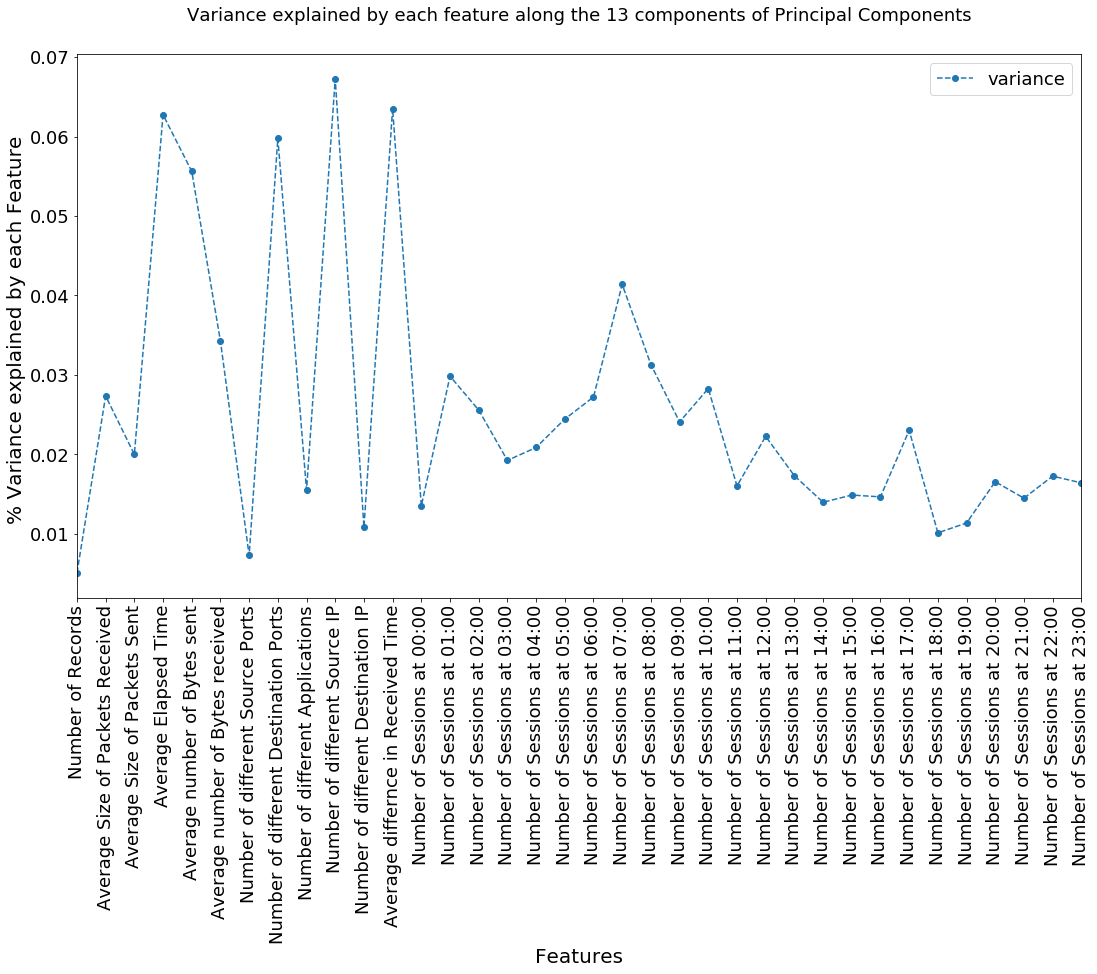

In [284]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

In [285]:
pca=PCA(n_components=11,random_state=0)
X_pca1_11=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 11 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11'])
m

Table for components of PCA when using 11 components with explained variance of 0.858664429176


Number of Records  Average Size of Packets Received  \
PC-1            0.242583                          0.021153   
PC-2            0.017328                          0.454302   
PC-3           -0.054606                          0.338581   
PC-4            0.056448                          0.026698   
PC-5            0.055278                          0.036709   
PC-6           -0.045882                         -0.008797   
PC-7           -0.020751                          0.016639   
PC-8           -0.004404                         -0.251590   
PC-9           -0.012371                          0.025987   
PC-10           0.013058                         -0.001136   
PC-11           0.013232                          0.000879   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.010653             -0.010593   
PC-2                       0.433282              0.045424   
PC-3                       0.329225             -0.043199   
PC-4                       0.037554              0.125762   
PC-5                       0.094100              0.204817   
PC-6                       0.028029              0.635684   
PC-7                      -0.070370              0.202554   
PC-8                       0.154789             -0.001694   
PC-9                      -0.001658             -0.370970   
PC-10                     -0.025515              0.342415   
PC-11                      0.027441              0.475631   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.005800                          0.023999   
PC-2                       0.250776                          0.411142   
PC-3                       0.188033                          0.303424   
PC-4                       0.017330                          0.014428   
PC-5                       0.120173                         -0.001953   
PC-6                       0.030122                         -0.036008   
PC-7                      -0.183518                          0.058761   
PC-8                       0.813878                         -0.430882   
PC-9                      -0.028885                          0.041820   
PC-10                     -0.071379                          0.008232   
PC-11                     -0.039562                         -0.031755   

       Number of different Source Ports  \
PC-1                           0.236657   
PC-2                           0.054343   
PC-3                          -0.072013   
PC-4                          -0.014136   
PC-5                          -0.029770   
PC-6                          -0.078446   
PC-7                          -0.010896   
PC-8                          -0.000793   
PC-9                          -0.107513   
PC-10                         -0.028541   
PC-11                          0.062861   

       Number of different Destination Ports  \
PC-1                                0.071946   
PC-2                                0.067847   
PC-3                               -0.141004   
PC-4                                0.008933   
PC-5                                0.200168   
PC-6                                0.503954   
PC-7                                0.347646   
PC-8                                0.028277   
PC-9                                0.498271   
PC-10                              -0.180931   
PC-11                              -0.377347   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.187322                       0.094096   
PC-2                           0.069086                       0.028029   
PC-3                           0.040048                       0.067620   
PC-4                          -0.166440                      -0.275178   
PC-5                          -0.259410                      -0.225512   
PC-6                          -0.022254                      -0.028850   
PC-7                           0.185691 

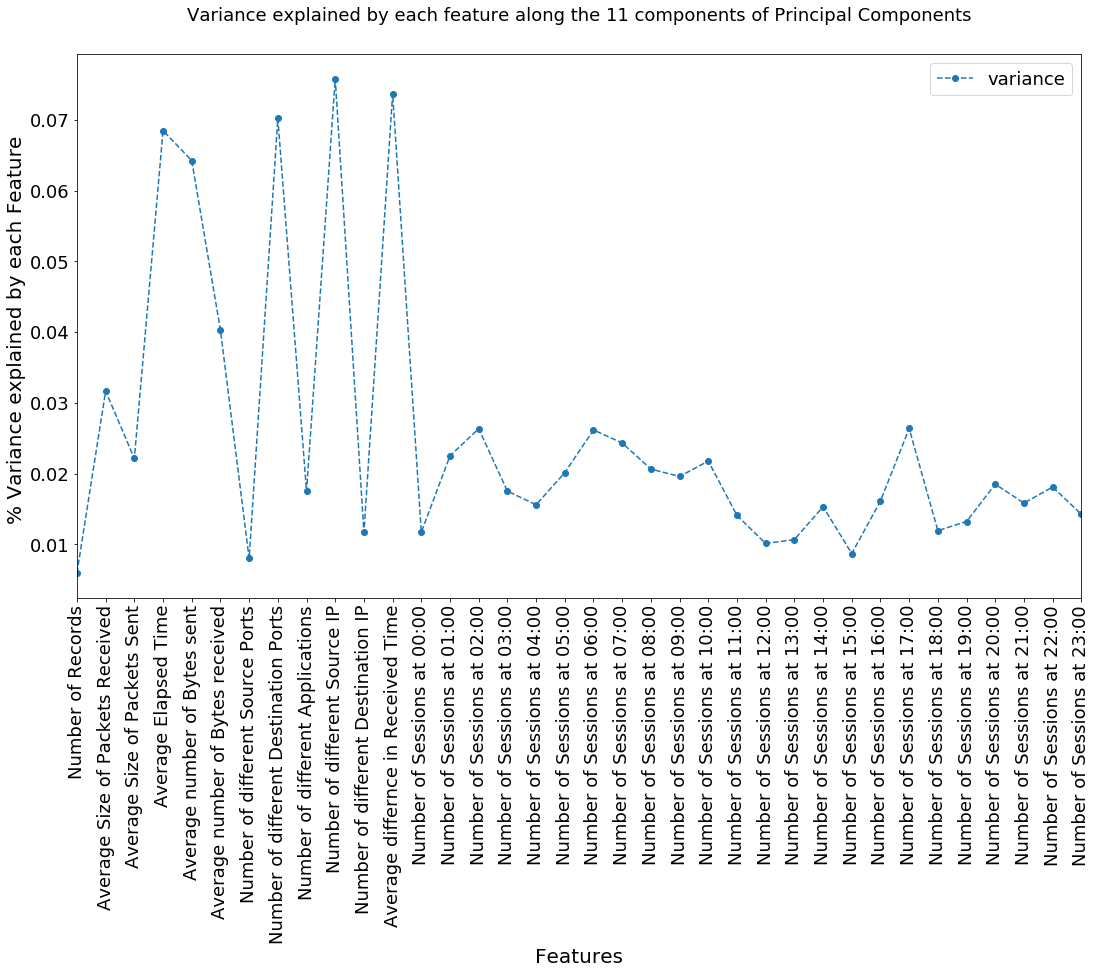

In [287]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 11 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
plt.savefig('C.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### K-Means

Kmeans on data


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 2.36200603981e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
Infected #      1176.00  39.0
Uninfected #    1189.00  26.0
Infected %        49.73  60.0
Uninfected %      50.27  40.0

Sum of square of distances is: 1.11952829922e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
Infected #      1094.00   6.00  115.00
Uninfected #    1146.00   5.00   64.00
Infected %        48.84  54.55   64.25
Uninfected %      51.16  45.45   35.75

Sum of square of distances is: 6.34007133584e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1     2        3
Infected #      230.00   4.00  35.0   946.00
Uninfected #    120.00   5.00  21.0  1069.00
Infected %       65.71  44.44  62.5    46.95
Uninfected %     34.29  55.56  37.5    53.05

Sum of square of distances is: 4.05468015084e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



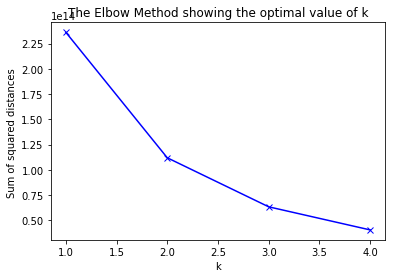

The minimum sum of sqaures of distances is : 4.05468015084e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [247]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 87480.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
Infected #       526.00  689.00
Uninfected #    1040.00  175.00
Infected %        33.59   79.75
Uninfected %      66.41   20.25

Sum of square of distances is: 65790.8505493

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      717.00   496.00    2.0
Uninfected #    195.00  1020.00    0.0
Infected %       78.62    32.72  100.0
Uninfected %     21.38    67.28    0.0

Sum of square of distances is: 56267.952692

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2       3
Infected #      697.00    2.0  179.00  337.00
Uninfected #    252.00    0.0   32.00  931.00
Infected %       73.45  100.0   84.83   26.58
Uninfected %     26.55    0.0   15.17   73.42

Sum of square of distances is: 49831.3719213

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



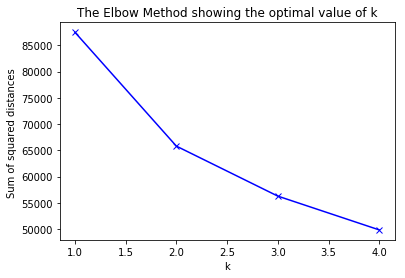

The minimum sum of sqaures of distances is : 49831.3719213  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [248]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.618036130179 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 7287.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1
Infected #      708.00   507.00
Uninfected #    192.00  1023.00
Infected %       78.67    33.14
Uninfected %     21.33    66.86

Sum of square of distances is: 5905.04538904

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1     2
Infected #       558.0  644.0  13.0
Uninfected #    1050.0  153.0  12.0
Infected %        34.7   80.8  52.0
Uninfected %      65.3   19.2  48.0

Sum of square of distances is: 4672.70962137

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
Infected #      647.00   541.00  25.00    2.0
Uninfected #    155.00  1042.00  18.00    0.0
Infected %       80.67    34.18  58.14  100.0
Uninfected %     19.33    65.82  41.86    0.0

Sum of square of distances is: 3570.06300705

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



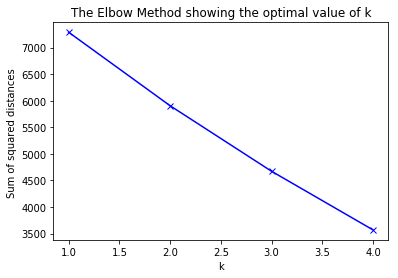

The minimum sum of sqaures of distances is : 3570.06300705  for k 4


In [249]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.665709819716 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 9716.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1
Infected #      619.00  596.00
Uninfected #    244.00  971.00
Infected %       71.73   38.03
Uninfected %     28.27   61.97

Sum of square of distances is: 8296.39216711

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2
Infected #      735.00  478.00    2.0
Uninfected #    251.00  964.00    0.0
Infected %       74.54   33.15  100.0
Uninfected %     25.46   66.85    0.0

Sum of square of distances is: 6895.77155038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1     2      3
Infected #      527.00  673.00  13.0    2.0
Uninfected #    204.00  999.00  12.0    0.0
Infected %       72.09   40.25  52.0  100.0
Uninfected %     27.91   59.75  48.0    0.0

Sum of square of distances is: 5634.06663937

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



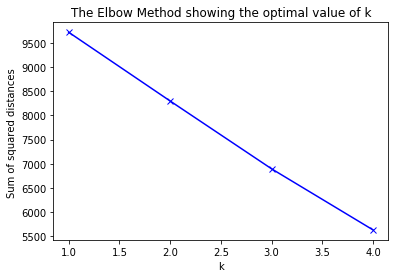

The minimum sum of sqaures of distances is : 5634.06663937  for k 4


In [250]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.708818886886 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 12145.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1213.00    2.0
Uninfected #    1215.00    0.0
Infected %        49.96  100.0
Uninfected %      50.04    0.0

Sum of square of distances is: 10345.9540803

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      394.00    2.0  819.00
Uninfected #    943.00    0.0  272.00
Infected %       29.47  100.0   75.07
Uninfected %     70.53    0.0   24.93

Sum of square of distances is: 8824.8632939

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
Infected #      746.00  363.00  104.00    2.0
Uninfected #    305.00  888.00   22.00    0.0
Infected %       70.98   29.02   82.54  100.0
Uninfected %     29.02   70.98   17.46    0.0

Sum of square of distances is: 7599.40189258

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



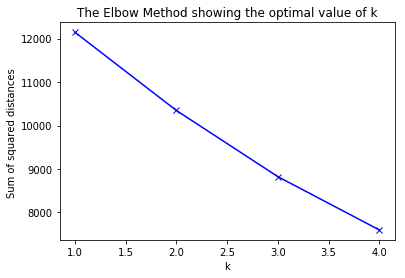

The minimum sum of sqaures of distances is : 7599.40189258  for k 4


In [251]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.743564339081 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 14574.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1213.00    2.0
Uninfected #    1215.00    0.0
Infected %        49.96  100.0
Uninfected %      50.04    0.0

Sum of square of distances is: 12713.1489448

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      407.00    1.0  807.00
Uninfected #    948.00    0.0  267.00
Infected %       30.04  100.0   75.14
Uninfected %     69.96    0.0   24.86

Sum of square of distances is: 11616.1772064

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
Infected #      525.00  430.00  258.00    2.0
Uninfected #    213.00  939.00   63.00    0.0
Infected %       71.14   31.41   80.37  100.0
Uninfected %     28.86   68.59   19.63    0.0

Sum of square of distances is: 9973.9543038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



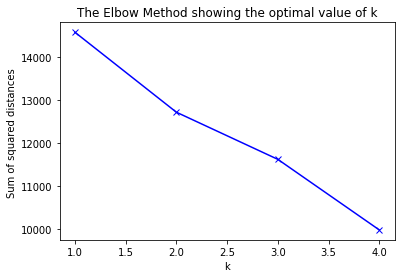

The minimum sum of sqaures of distances is : 9973.9543038  for k 4


In [252]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.821040280312 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 21861.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0     1
Infected #      1212.0   3.0
Uninfected #    1212.0   3.0
Infected %        50.0  50.0
Uninfected %      50.0  50.0

Sum of square of distances is: 19896.9065972

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1     2
Infected #      388.00  824.00   3.0
Uninfected #    904.00  308.00   3.0
Infected %       30.03   72.79  50.0
Uninfected %     69.97   27.21  50.0

Sum of square of distances is: 18272.2506651

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1     2      3
Infected #      363.00   848.00   3.0    1.0
Uninfected #     86.00  1126.00   3.0    0.0
Infected %       80.85    42.96  50.0  100.0
Uninfected %     19.15    57.04  50.0    0.0

Sum of square of distances is: 16626.4600184

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



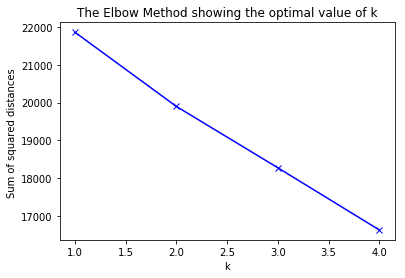

The minimum sum of sqaures of distances is : 16626.4600184  for k 4


In [253]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.858664429176 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 26719.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1214.00    1.0
Uninfected #    1215.00    0.0
Infected %        49.98  100.0
Uninfected %      50.02    0.0

Sum of square of distances is: 24781.5954095

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2
Infected #       718.00  494.00   3.0
Uninfected #    1080.00  132.00   3.0
Infected %        39.93   78.91  50.0
Uninfected %      60.07   21.09  50.0

Sum of square of distances is: 23170.0326666

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2     3
Infected #      137.00  723.00  352.00   3.0
Uninfected #     34.00  339.00  839.00   3.0
Infected %       80.12   68.08   29.55  50.0
Uninfected %     19.88   31.92   70.45  50.0

Sum of square of distances is: 21793.565591

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



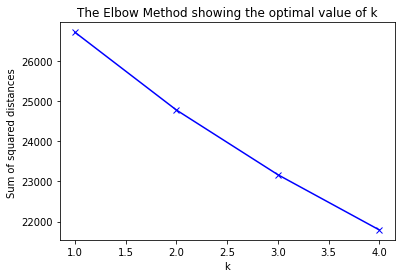

The minimum sum of sqaures of distances is : 21793.565591  for k 4


In [254]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.874489906476 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 29148.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
Infected #      381.00  834.0
Uninfected #    881.00  334.0
Infected %       30.19   71.4
Uninfected %     69.81   28.6

Sum of square of distances is: 27518.5950344

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      473.00   741.00    1.0
Uninfected #    136.00  1079.00    0.0
Infected %       77.67    40.71  100.0
Uninfected %     22.33    59.29    0.0

Sum of square of distances is: 25603.4836569

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2      3
Infected #       712.00  499.00   3.0    1.0
Uninfected #    1080.00  132.00   3.0    0.0
Infected %        39.73   79.08  50.0  100.0
Uninfected %      60.27   20.92  50.0    0.0

Sum of square of distances is: 23630.3465913

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



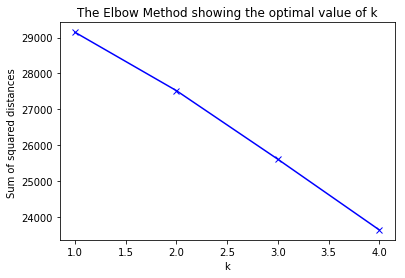

The minimum sum of sqaures of distances is : 23630.3465913  for k 4


In [255]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.885937278413 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 31577.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1
Infected #      486.00  729.00
Uninfected #    987.00  228.00
Infected %       32.99   76.18
Uninfected %     67.01   23.82

Sum of square of distances is: 29932.9161223

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      844.00    1.0  370.00
Uninfected #    334.00    0.0  881.00
Infected %       71.65  100.0   29.58
Uninfected %     28.35    0.0   70.42

Sum of square of distances is: 27953.8828462

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2      3
Infected #       687.00  524.00   3.0    1.0
Uninfected #    1064.00  148.00   3.0    0.0
Infected %        39.23   77.98  50.0  100.0
Uninfected %      60.77   22.02  50.0    0.0

Sum of square of distances is: 25997.6144023

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



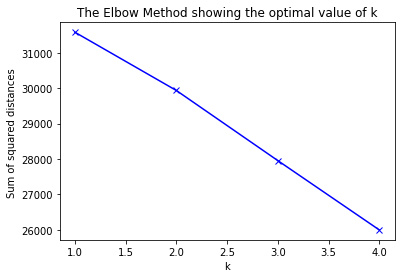

The minimum sum of sqaures of distances is : 25997.6144023  for k 4


In [256]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Infected/Uninfected Users</a></h2>

In [257]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


0    2832
1    1215
Name: Target, dtype: int64

### feature Set

In [258]:
X=z.iloc[:,z.columns!='Target']
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']
X.head(2)

Number of Records  \
Source_User                                                             
f312c5ac2868560b18b854fe68465445253bb1850ca9092...               2526   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...               2507   

                                                    Average Size of Packets Received  \
Source_User                                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                        152.272763   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                        132.393299   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                    115.762470   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                     56.954128   

                                                    Average Elapsed Time  \
Source_User                                                                
f312c5ac2868560b18b854fe68465445253bb1850ca9092...            102.322249   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...             90.832469   

                                                    Average number of Bytes sent  \
Source_User                                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                  18103.792953   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                   7080.045473   

                                                    Average number of Bytes received  \
Source_User                                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                     187670.846397   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                     157025.019944   

                                                    Number of different Source Ports  \
Source_User                                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                            2247.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                            2332.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                                   16.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                                   13.0   

                                                    Number of different Applications  \
Source_User                                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                                42   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                                43   

                                                    Number of different Source IP  \
Source_User                                                                         
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                             15   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                             45   

                                                    Number of different Destination IP  \
Source_User                                                                              
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                                 641   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...                                 708   

                                                    Average differnce in Received Time  \
Source_User                                                                              
f312c5ac2868560b18b854fe68465445253bb1850ca9092...                         1059.323040   
4f720c932836bb0fd3903d8

In [259]:
target=z.Target.reset_index(drop=True)

### Scaled X

In [260]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [261]:
scaled_X[0:2]

array([[  7.08584226e-01,   1.00458942e-01,   3.26806205e-01,
          1.33125340e-02,   6.79357519e-02,   1.17702290e-01,
          1.00742238e+00,  -3.18280228e-02,   1.38642272e+00,
         -5.73369609e-01,   9.51661219e-01,  -3.52840839e-01,
          4.83566592e-01,   6.75063551e-01,   1.63764248e-01,
         -1.05324717e-02,  -1.07221840e-01,  -2.63644024e-02,
         -4.77087948e-02,  -2.67810006e-01,   5.24644767e-01,
          1.47202604e-01,   8.25598975e-01,   1.33122647e+00,
          3.52833599e-01,   1.77485966e+00,   1.47304863e+00,
          7.24066404e-01,   7.62830496e-01,   5.48426105e-01,
          6.77085462e-01,   8.99647440e-01,   5.63923423e-01,
          1.48113664e+00,   1.22824996e+00,   8.66335967e-01],
       [  6.98964282e-01,   2.14443664e-02,  -8.03109851e-02,
         -1.00132821e-01,  -1.16476886e-01,   1.93038174e-02,
          1.07624014e+00,  -5.46771255e-02,   1.46444442e+00,
          1.26546612e+00,   1.13889700e+00,  -3.52784240e-01,
       

In [262]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

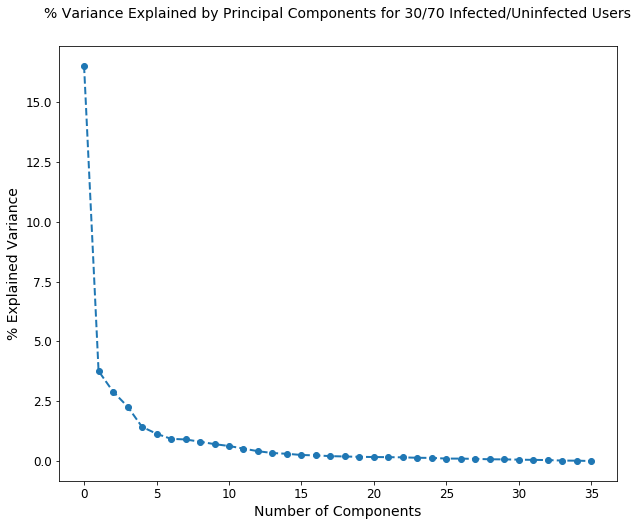

In [264]:
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 30/70 Infected/Uninfected Users',size=14,y=1.05)
plt.savefig('D.jpeg',dpi=1200)
plt.show()

In [265]:
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 16.5298 		 0
2 		 3.76398 		 77.2291192377
3 		 2.90195 		 22.9019977949
4 		 2.27906 		 21.4644568154
5 		 1.42811 		 37.3377148563
6 		 1.14197 		 20.0363281827
7 		 0.9281 		 18.728466076
8 		 0.90213 		 2.79854656189
9 		 0.80819 		 10.4125461012
10 		 0.7065 		 12.5823025565
11 		 0.6283 		 11.0690747946
12 		 0.52049 		 17.1586013392
13 		 0.41076 		 21.0815350408
14 		 0.33482 		 18.4882112494
15 		 0.30246 		 9.6649728933
16 		 0.25278 		 16.4247684285
17 		 0.23485 		 7.09476847847
18 		 0.2051 		 12.6682978255
19 		 0.19021 		 7.2567342323
20 		 0.17463 		 8.1932891807
21 		 0.1678 		 3.91066852518
22 		 0.1617 		 3.63746626735
23 		 0.15416 		 4.66229516911
24 		 0.13566 		 11.9976167206
25 		 0.13 		 4.17309613764
26 		 0.10238 		 21.2478522128
27 		 0.101 		 1.34471301038
28 		 0.08993 		 10.9581766096
29 		 0.07345 		 18.3248879681
30 		 0.06892 		 6.17635031279
31 		 0.05735 		 16.7872690475
32 		 0.0481

#### I think that we should take 13 components because the variance explained with it is 91.50%. Inaddition ,we can see from the table above that after 13 components the addition in explained variance with each component is flattedned out ecept few sudeen increases.

In [266]:
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.915033450989


Number of Records  Average Size of Packets Received  \
PC-1            0.240442                          0.021149   
PC-2            0.035895                         -0.087901   
PC-3           -0.027244                          0.549539   
PC-4            0.124586                          0.095652   
PC-5            0.003029                          0.020703   
PC-6            0.015238                          0.031525   
PC-7           -0.000731                         -0.221570   
PC-8            0.008115                         -0.099717   
PC-9            0.011415                          0.009091   
PC-10          -0.022024                         -0.019180   
PC-11           0.032588                          0.015762   
PC-12           0.012639                          0.007717   
PC-13          -0.017706                          0.009079   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.013889             -0.003442   
PC-2                      -0.079105             -0.015431   
PC-3                       0.534553              0.017832   
PC-4                       0.099401              0.009968   
PC-5                       0.055128              0.489017   
PC-6                       0.050419             -0.398983   
PC-7                       0.136241              0.083893   
PC-8                       0.024450             -0.051105   
PC-9                      -0.016956              0.729198   
PC-10                     -0.019700             -0.115175   
PC-11                      0.005721             -0.176995   
PC-12                      0.044800              0.108983   
PC-13                      0.009293              0.018087   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.008617                          0.022419   
PC-2                      -0.048396                         -0.084018   
PC-3                       0.292459                          0.509415   
PC-4                       0.059609                          0.083726   
PC-5                       0.034216                          0.002440   
PC-6                       0.069495                          0.022041   
PC-7                       0.819280                         -0.365183   
PC-8                       0.284405                         -0.145650   
PC-9                      -0.084435                          0.007596   
PC-10                      0.036524                         -0.015089   
PC-11                     -0.033987                          0.026591   
PC-12                     -0.013398                         -0.009783   
PC-13                     -0.026883                          0.012984   

       Number of different Source Ports  \
PC-1                           0.225722   
PC-2                          -0.147763   
PC-3                          -0.021024   
PC-4                           0.012749   
PC-5                          -0.076792   
PC-6                           0.024721   
PC-7                          -0.015884   
PC-8                           0.016363   
PC-9                           0.056314   
PC-10                          0.095789   
PC-11                         -0.133241   
PC-12                         -0.043299   
PC-13                         -0.091476   

       Number of different Destination Ports  \
PC-1                                0.065336   
PC-2                               -0.100701   
PC-3                               -0.012955   
PC-4                               -0.106113   
PC-5                                0.559822   
PC-6                               -0.355233   
PC-7                               -0.058419   
PC-8                                0.102893   
PC-9                               -0.446181   
PC-10                              -0.014126   
PC-11                               0.296737   
PC-12                              -0.225958   
PC-13                            

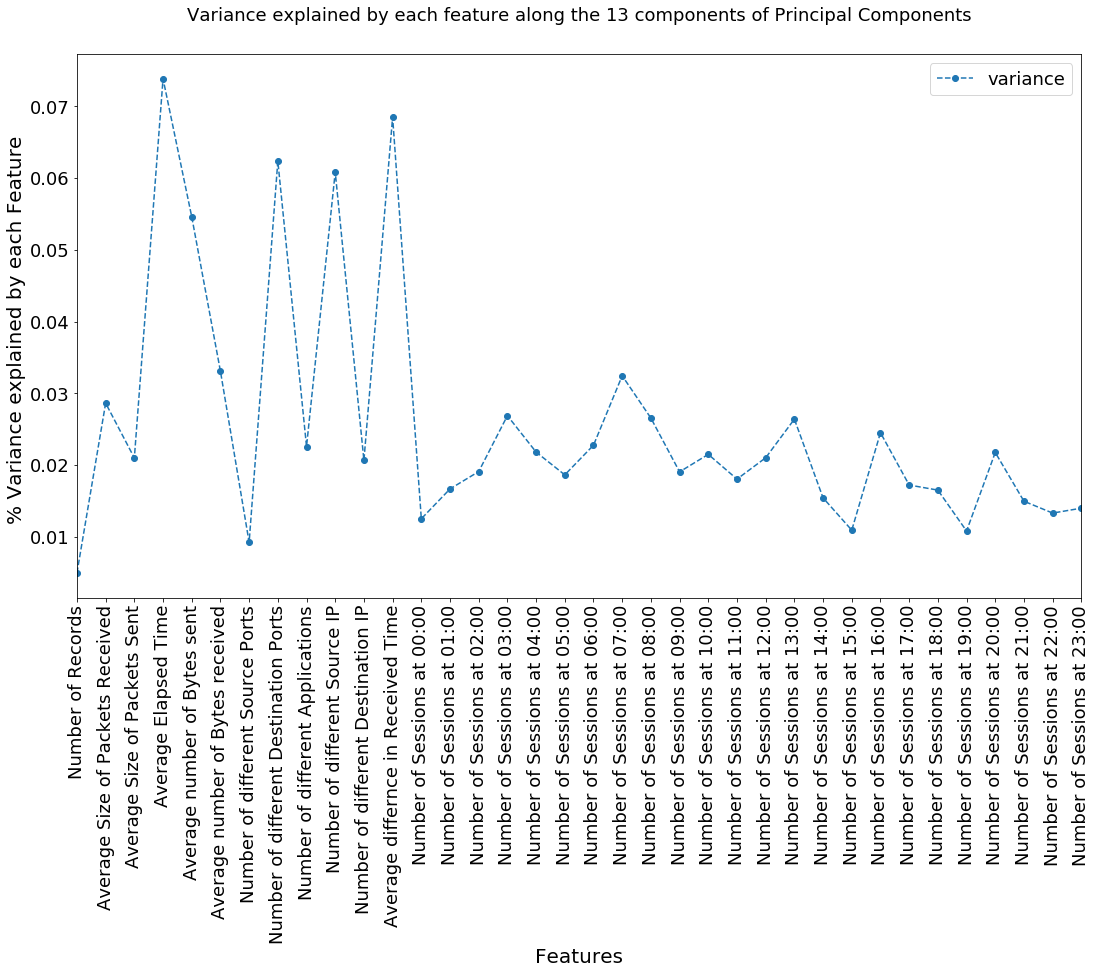

In [270]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('E.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### K-Means

Kmeans on data


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 4.11965043873e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2756.00  76.00
Uninfected #    1176.00  39.00
Infected %        70.09  66.09
Uninfected %      29.91  33.91

Sum of square of distances is: 1.86479843912e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
Infected #      2686.00  16.00  130.00
Uninfected #    1106.00   6.00  103.00
Infected %        70.83  72.73   55.79
Uninfected %      29.17  27.27   44.21

Sum of square of distances is: 9.9578569803e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2      3
Infected #      323.00  64.00  2432.00  13.00
Uninfected #    252.00  37.00   922.00   4.00
Infected %       56.17  63.37    72.51  76.47
Uninfected %     43.83  36.63    27.49  23.53

Sum of square of distances is: 6.53938020011e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



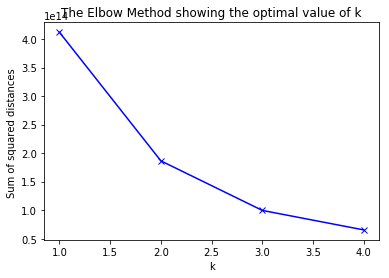

The minimum sum of sqaures of distances is : 6.53938020011e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [201]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 145692.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
Infected #      2348.00  484.00
Uninfected #     466.00  749.00
Infected %        83.44   39.25
Uninfected %      16.56   60.75

Sum of square of distances is: 115492.558243

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
Infected #      2336.00    1.0  495.0
Uninfected #     460.00    0.0  755.0
Infected %        83.55  100.0   39.6
Uninfected %      16.45    0.0   60.4

Sum of square of distances is: 91334.0893349

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2       3
Infected #      2286.00   7.00    1.0  538.00
Uninfected #     409.00  15.00    0.0  791.00
Infected %        84.82  31.82  100.0   40.48
Uninfected %      15.18  68.18    0.0   59.52

Sum of square of distances is: 79362.9536632

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



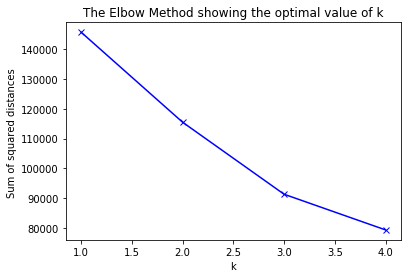

The minimum sum of sqaures of distances is : 79362.9536632  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [202]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.644166598093 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 12138.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 9147.59741053

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      2276.0    1.0  555.00
Uninfected #     453.0    0.0  762.00
Infected %        83.4  100.0   42.14
Uninfected %      16.6    0.0   57.86

Sum of square of distances is: 6959.26271926

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
Infected #      2301.00    1.0  499.0  31.00
Uninfected #     471.00    0.0  730.0  14.00
Infected %        83.01  100.0   40.6  68.89
Uninfected %      16.99    0.0   59.4  31.11

Sum of square of distances is: 5033.38111909

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



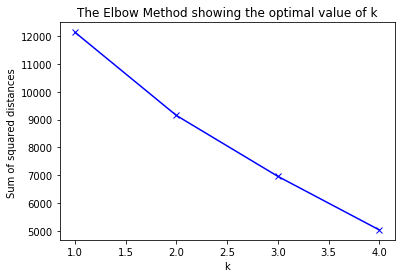

The minimum sum of sqaures of distances is : 5033.38111909  for k 4


In [203]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.707458312998 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 16184.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 12785.0553086

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      632.00  2199.00    1.0
Uninfected #    810.00   405.00    0.0
Infected %       43.83    84.45  100.0
Uninfected %     56.17    15.55    0.0

Sum of square of distances is: 10471.5459318

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2      3
Infected #      2196.00    1.0  605.00  30.00
Uninfected #     404.00    0.0  798.00  13.00
Infected %        84.46  100.0   43.12  69.77
Uninfected %      15.54    0.0   56.88  30.23

Sum of square of distances is: 8359.56060256

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



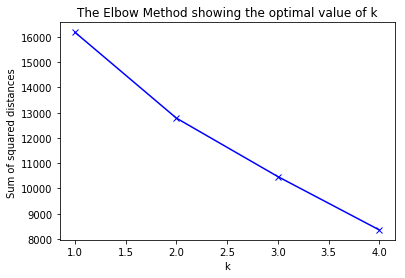

The minimum sum of sqaures of distances is : 8359.56060256  for k 4


In [204]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.747118347864 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 20230.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 16816.5824246

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
Infected #      2040.00  791.0    1.0
Uninfected #     316.00  899.0    0.0
Infected %        86.59   46.8  100.0
Uninfected %      13.41   53.2    0.0

Sum of square of distances is: 14354.8156188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2     3
Infected #      2020.00    1.0  805.0   6.0
Uninfected #     312.00    0.0  897.0   6.0
Infected %        86.62  100.0   47.3  50.0
Uninfected %      13.38    0.0   52.7  50.0

Sum of square of distances is: 11990.153425

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



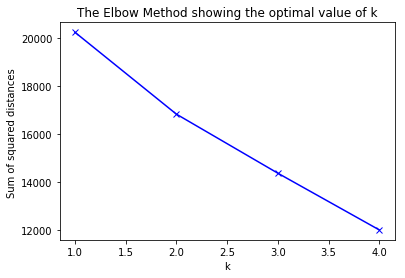

The minimum sum of sqaures of distances is : 11990.153425  for k 4


In [205]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.778831967986 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 24276.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 20786.0166095

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1       2
Infected #      887.0    1.0  1944.0
Uninfected #    927.0    0.0   288.0
Infected %       48.9  100.0    87.1
Uninfected %     51.1    0.0    12.9

Sum of square of distances is: 18242.9359757

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
Infected #      1822.00  1001.00    1.0   8.00
Uninfected #     244.00   967.00    0.0   4.00
Infected %        88.19    50.86  100.0  66.67
Uninfected %      11.81    49.14    0.0  33.33

Sum of square of distances is: 15643.441188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



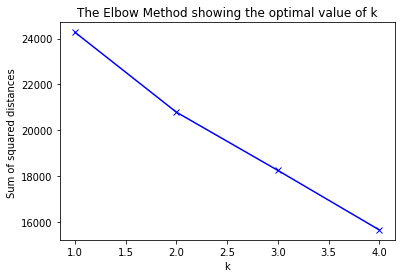

The minimum sum of sqaures of distances is : 15643.441188  for k 4


In [206]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.85210316273 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 36414.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
Infected #      2829.00   3.0
Uninfected #    1212.00   3.0
Infected %        70.01  50.0
Uninfected %      29.99  50.0

Sum of square of distances is: 33442.1115007

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1      2
Infected #      2831.0    1.0    0.0
Uninfected #    1213.0    0.0    2.0
Infected %        70.0  100.0    0.0
Uninfected %      30.0    0.0  100.0

Sum of square of distances is: 30112.9447503

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1     2      3
Infected #      2824.00   4.00   3.0    1.0
Uninfected #    1209.00   3.00   3.0    0.0
Infected %        70.02  57.14  50.0  100.0
Uninfected %      29.98  42.86  50.0    0.0

Sum of square of distances is: 26955.5253074

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



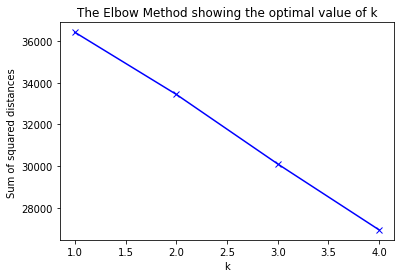

The minimum sum of sqaures of distances is : 26955.5253074  for k 4


In [207]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.88917180198 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 44506.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 40676.001567

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
Infected #      943.00    1.0  1888.00
Uninfected #    934.00    0.0   281.00
Infected %       50.24  100.0    87.04
Uninfected %     49.76    0.0    12.96

Sum of square of distances is: 37902.0046982

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1      2        3
Infected #      940.00    0.0    1.0  1891.00
Uninfected #    936.00    1.0    0.0   278.00
Infected %       50.11    0.0  100.0    87.18
Uninfected %     49.89  100.0    0.0    12.82

Sum of square of distances is: 35265.9040269

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



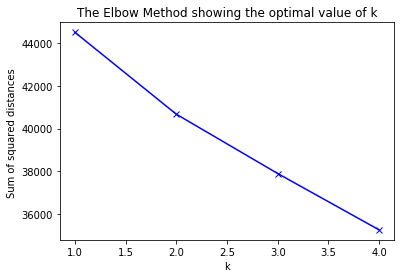

The minimum sum of sqaures of distances is : 35265.9040269  for k 4


In [208]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.903626327021 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 48552.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 44698.9220012

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
Infected #      752.00    1.0  2079.00
Uninfected #    877.00    0.0   338.00
Infected %       46.16  100.0    86.02
Uninfected %     53.84    0.0    13.98

Sum of square of distances is: 41932.8519855

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2      3
Infected #      994.00  1837.0    1.0    0.0
Uninfected #    937.00   277.0    0.0    1.0
Infected %       51.48    86.9  100.0    0.0
Uninfected %     48.52    13.1    0.0  100.0

Sum of square of distances is: 39284.7447022

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



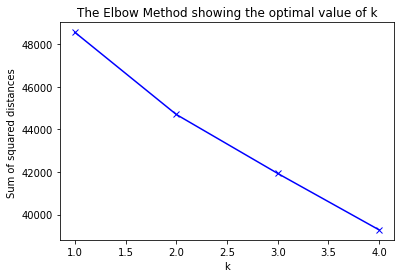

The minimum sum of sqaures of distances is : 39284.7447022  for k 4


In [209]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.915033450989 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 52598.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1
Infected #      2828.0   4.00
Uninfected #    1212.0   3.00
Infected %        70.0  57.14
Uninfected %      30.0  42.86

Sum of square of distances is: 49252.2638939

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      2169.0    1.0  662.00
Uninfected #     365.0    0.0  850.00
Infected %        85.6  100.0   43.78
Uninfected %      14.4    0.0   56.22

Sum of square of distances is: 45947.8272717

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
Infected #      724.00  2103.00    1.0   4.00
Uninfected #    868.00   344.00    0.0   3.00
Infected %       45.48    85.94  100.0  57.14
Uninfected %     54.52    14.06    0.0  42.86

Sum of square of distances is: 42615.7303687

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



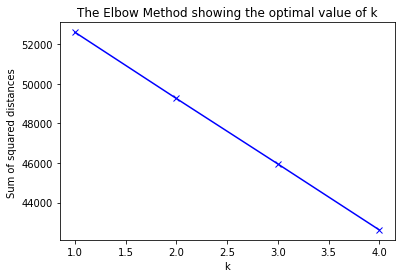

The minimum sum of sqaures of distances is : 42615.7303687  for k 4


In [210]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

### feature contribution when using PCA-12

In [211]:
pca=PCA(n_components=12,random_state=0,whiten=True,svd_solver='arpack')
X_pca_12=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12'])
m

Number of Records  Average Size of Packets Received  \
PC-1            0.240442                          0.021149   
PC-2            0.035895                         -0.087901   
PC-3           -0.027244                          0.549538   
PC-4            0.124586                          0.095652   
PC-5            0.003029                          0.020703   
PC-6            0.015238                          0.031526   
PC-7           -0.000731                         -0.221571   
PC-8            0.008115                         -0.099718   
PC-9            0.011416                          0.009092   
PC-10          -0.022024                         -0.019176   
PC-11           0.032590                          0.015767   
PC-12           0.012636                          0.007705   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.013889             -0.003442   
PC-2                      -0.079105             -0.015431   
PC-3                       0.534553              0.017832   
PC-4                       0.099401              0.009968   
PC-5                       0.055129              0.489017   
PC-6                       0.050412             -0.398983   
PC-7                       0.136255              0.083893   
PC-8                       0.024465             -0.051105   
PC-9                      -0.016995              0.729199   
PC-10                     -0.019770             -0.115172   
PC-11                      0.005621             -0.176993   
PC-12                      0.045041              0.108973   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.008617                          0.022419   
PC-2                      -0.048396                         -0.084018   
PC-3                       0.292459                          0.509414   
PC-4                       0.059609                          0.083726   
PC-5                       0.034216                          0.002439   
PC-6                       0.069498                          0.022046   
PC-7                       0.819273                         -0.365193   
PC-8                       0.284398                         -0.145661   
PC-9                      -0.084415                          0.007624   
PC-10                      0.036558                         -0.015039   
PC-11                     -0.033938                          0.026663   
PC-12                     -0.013517                         -0.009954   

       Number of different Source Ports  \
PC-1                           0.225722   
PC-2                          -0.147763   
PC-3                          -0.021024   
PC-4                           0.012749   
PC-5                          -0.076792   
PC-6                           0.024720   
PC-7                          -0.015887   
PC-8                           0.016362   
PC-9                           0.056314   
PC-10                          0.095778   
PC-11                         -0.133226   
PC-12                         -0.043279   

       Number of different Destination Ports  \
PC-1                                0.065336   
PC-2                               -0.100701   
PC-3                               -0.012955   
PC-4                               -0.106113   
PC-5                                0.559823   
PC-6                               -0.355232   
PC-7                               -0.058416   
PC-8                                0.102891   
PC-9                               -0.446180   
PC-10                              -0.014117   
PC-11                               0.296736   
PC-12                              -0.225980   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.164688                       0.099022   
PC-2                          -0.151292                      -0.089952   
PC-3                           0.077746          

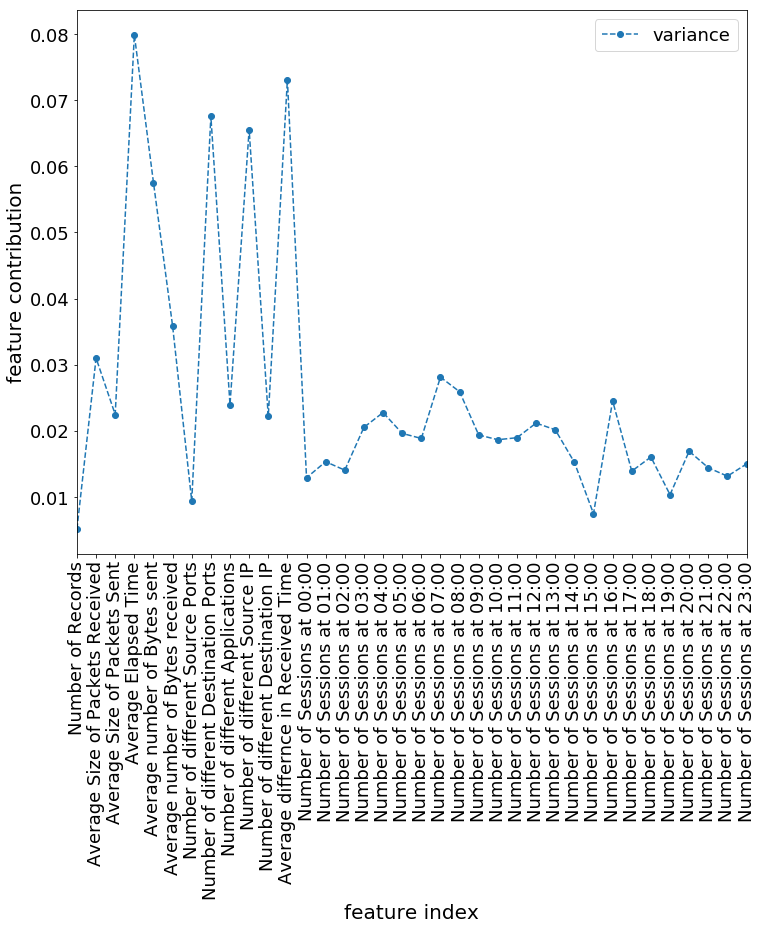

In [212]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-11

In [213]:
pca=PCA(n_components=11,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_11=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11'])
m

Number of Records  Average Size of Packets Received  \
PC-1            0.240442                          0.021149   
PC-2            0.035895                         -0.087901   
PC-3           -0.027244                          0.549538   
PC-4            0.124586                          0.095652   
PC-5            0.003029                          0.020703   
PC-6            0.015238                          0.031526   
PC-7           -0.000731                         -0.221571   
PC-8            0.008115                         -0.099718   
PC-9            0.011416                          0.009092   
PC-10          -0.022024                         -0.019176   
PC-11           0.032590                          0.015767   

       Average Size of Packets Sent  Average Elapsed Time  \
PC-1                       0.013889             -0.003442   
PC-2                      -0.079105             -0.015431   
PC-3                       0.534553              0.017832   
PC-4                       0.099401              0.009968   
PC-5                       0.055129              0.489017   
PC-6                       0.050412             -0.398983   
PC-7                       0.136255              0.083893   
PC-8                       0.024465             -0.051105   
PC-9                      -0.016995              0.729199   
PC-10                     -0.019770             -0.115172   
PC-11                      0.005621             -0.176993   

       Average number of Bytes sent  Average number of Bytes received  \
PC-1                       0.008617                          0.022419   
PC-2                      -0.048396                         -0.084018   
PC-3                       0.292459                          0.509414   
PC-4                       0.059609                          0.083726   
PC-5                       0.034216                          0.002439   
PC-6                       0.069498                          0.022046   
PC-7                       0.819273                         -0.365193   
PC-8                       0.284398                         -0.145661   
PC-9                      -0.084415                          0.007624   
PC-10                      0.036558                         -0.015039   
PC-11                     -0.033938                          0.026663   

       Number of different Source Ports  \
PC-1                           0.225722   
PC-2                          -0.147763   
PC-3                          -0.021024   
PC-4                           0.012749   
PC-5                          -0.076792   
PC-6                           0.024720   
PC-7                          -0.015887   
PC-8                           0.016362   
PC-9                           0.056314   
PC-10                          0.095778   
PC-11                         -0.133226   

       Number of different Destination Ports  \
PC-1                                0.065336   
PC-2                               -0.100701   
PC-3                               -0.012955   
PC-4                               -0.106113   
PC-5                                0.559823   
PC-6                               -0.355232   
PC-7                               -0.058416   
PC-8                                0.102891   
PC-9                               -0.446180   
PC-10                              -0.014117   
PC-11                               0.296736   

       Number of different Applications  Number of different Source IP  \
PC-1                           0.164688                       0.099022   
PC-2                          -0.151292                      -0.089952   
PC-3                           0.077746                       0.060132   
PC-4                          -0.215064                      -0.215013   
PC-5                          -0.258243                      -0.332679   
PC-6                          -0.186510                      -0.294848   
PC-7                          -0.035758 

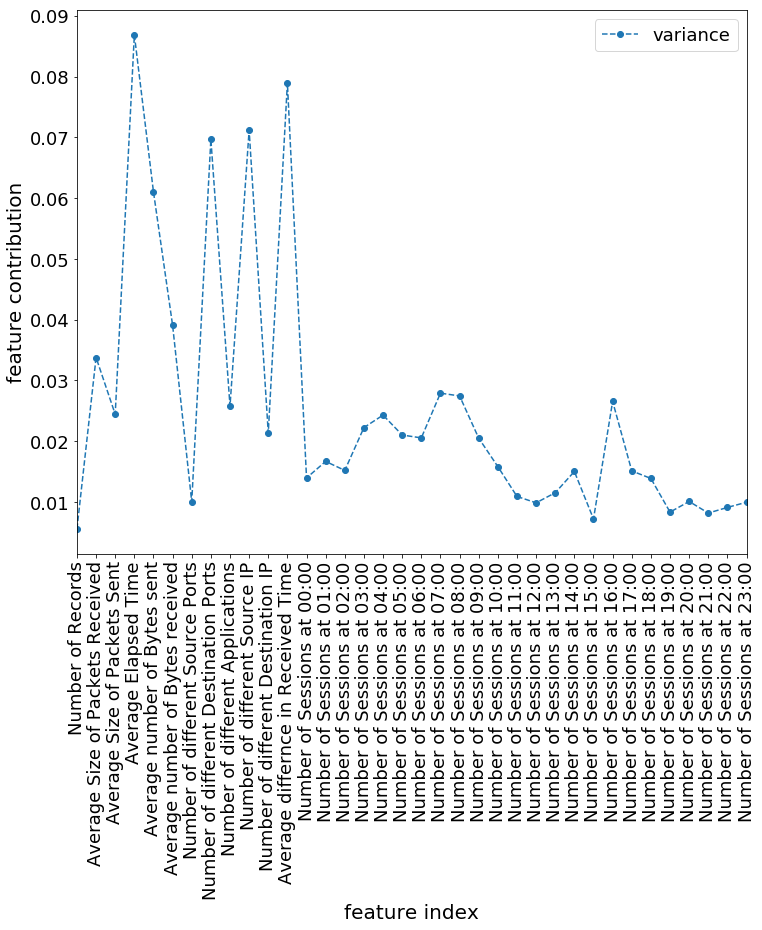

In [214]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-9

In [215]:
pca=PCA(n_components=9,random_state=0,whiten=True,svd_solver='arpack')
X_pca_9=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240442                          0.021149   
PC-2           0.035895                         -0.087901   
PC-3          -0.027244                          0.549538   
PC-4           0.124586                          0.095652   
PC-5           0.003029                          0.020703   
PC-6           0.015238                          0.031526   
PC-7          -0.000731                         -0.221571   
PC-8           0.008115                         -0.099718   
PC-9           0.011416                          0.009092   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.013889             -0.003442   
PC-2                     -0.079105             -0.015431   
PC-3                      0.534553              0.017832   
PC-4                      0.099401              0.009968   
PC-5                      0.055129              0.489017   
PC-6                      0.050412             -0.398983   
PC-7                      0.136255              0.083893   
PC-8                      0.024465             -0.051105   
PC-9                     -0.016995              0.729199   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.008617                          0.022419   
PC-2                     -0.048396                         -0.084018   
PC-3                      0.292459                          0.509414   
PC-4                      0.059609                          0.083726   
PC-5                      0.034216                          0.002439   
PC-6                      0.069498                          0.022046   
PC-7                      0.819273                         -0.365193   
PC-8                      0.284398                         -0.145661   
PC-9                     -0.084415                          0.007624   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.225722                               0.065336   
PC-2                         -0.147763                              -0.100701   
PC-3                         -0.021024                              -0.012955   
PC-4                          0.012749                              -0.106113   
PC-5                         -0.076792                               0.559823   
PC-6                          0.024720                              -0.355232   
PC-7                         -0.015887                              -0.058416   
PC-8                          0.016362                               0.102891   
PC-9                          0.056314                              -0.446180   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.164688                       0.099022   
PC-2                         -0.151292                      -0.089952   
PC-3                          0.077746                       0.060132   
PC-4                         -0.215064                      -0.215013   
PC-5                         -0.258243                      -0.332679   
PC-6                         -0.186510                      -0.294848   
PC-7                         -0.035758                       0.028091   
PC-8                          0.072817                       0.128334   
PC-9                          0.075239                       0.279190   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.188601                           -0.060239   
PC-2                           -0.167330                            0.081503   
PC-3                            0.017277                           -0.059573   
PC-4                           -0.187932                            0.155386   
PC-5                            0.177393                            0.327260   
PC-6                           -0.201878           

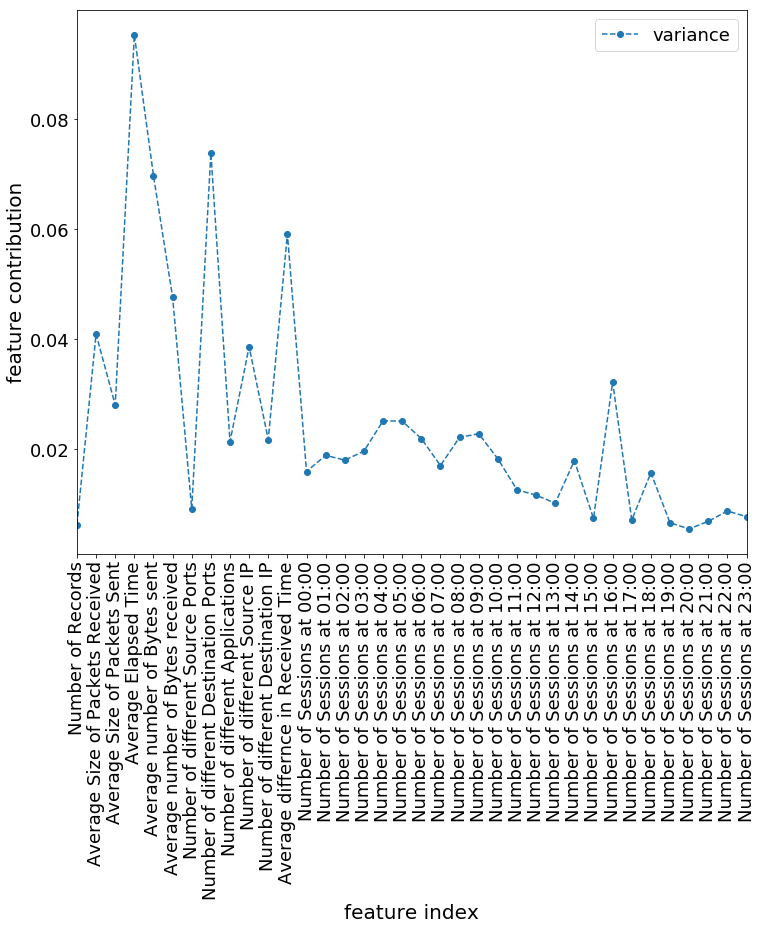

In [216]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-6

In [217]:
pca=PCA(n_components=6,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_6=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240442                          0.021149   
PC-2           0.035895                         -0.087901   
PC-3          -0.027244                          0.549538   
PC-4           0.124586                          0.095652   
PC-5           0.003029                          0.020703   
PC-6           0.015238                          0.031526   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.013889             -0.003442   
PC-2                     -0.079105             -0.015431   
PC-3                      0.534553              0.017832   
PC-4                      0.099401              0.009968   
PC-5                      0.055129              0.489017   
PC-6                      0.050412             -0.398983   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.008617                          0.022419   
PC-2                     -0.048396                         -0.084018   
PC-3                      0.292459                          0.509414   
PC-4                      0.059609                          0.083726   
PC-5                      0.034216                          0.002439   
PC-6                      0.069498                          0.022046   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.225722                               0.065336   
PC-2                         -0.147763                              -0.100701   
PC-3                         -0.021024                              -0.012955   
PC-4                          0.012749                              -0.106113   
PC-5                         -0.076792                               0.559823   
PC-6                          0.024720                              -0.355232   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.164688                       0.099022   
PC-2                         -0.151292                      -0.089952   
PC-3                          0.077746                       0.060132   
PC-4                         -0.215064                      -0.215013   
PC-5                         -0.258243                      -0.332679   
PC-6                         -0.186510                      -0.294848   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.188601                           -0.060239   
PC-2                           -0.167330                            0.081503   
PC-3                            0.017277                           -0.059573   
PC-4                           -0.187932                            0.155386   
PC-5                            0.177393                            0.327260   
PC-6                           -0.201878                            0.298913   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.185825                     0.174754   
PC-2                     0.273880                     0.268282   
PC-3                     0.018988                     0.010044   
PC-4                     0.172437                     0.226791   
PC-5                    -0.060306                    -0.061329   
PC-6                    -0.120632                    -0.165160   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.177771                     0.175937   
PC-2                     0.197054                    -0.113936   
PC-3                    -0.008636                    -0.065003   
PC-4                     0.284319                     0.310714   
PC-5                    -0.057703                     0.001828   
PC-6                    -0.163257                    -0.049159   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1               

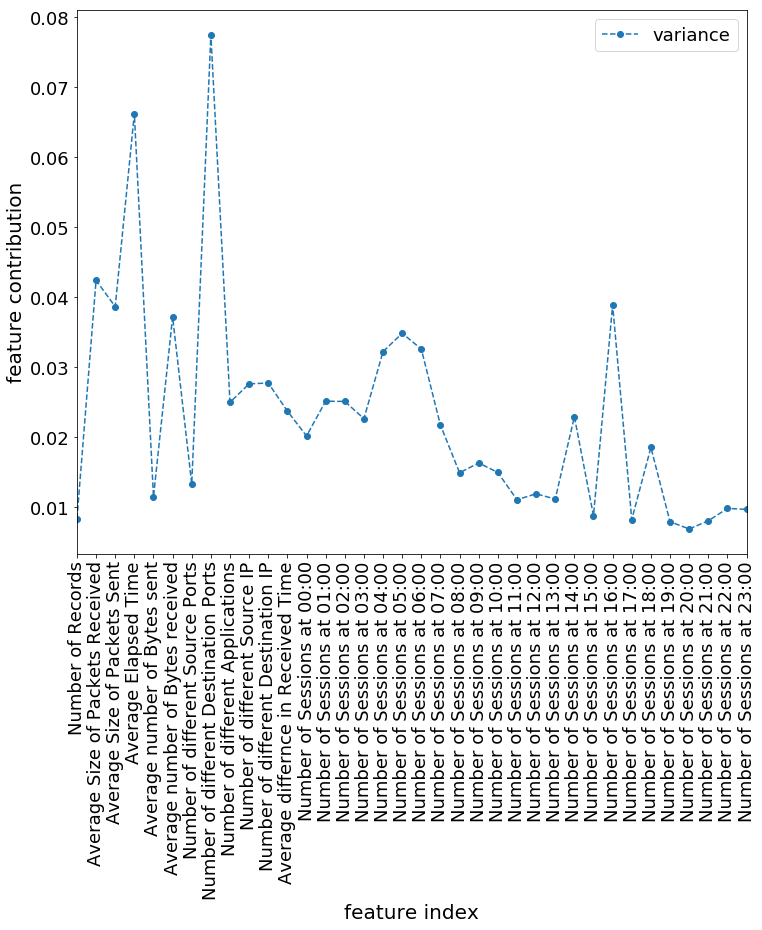

In [218]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-5

In [219]:
pca=PCA(n_components=5,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_5=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240442                          0.021149   
PC-2           0.035895                         -0.087901   
PC-3          -0.027244                          0.549538   
PC-4           0.124586                          0.095652   
PC-5           0.003029                          0.020703   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.013889             -0.003442   
PC-2                     -0.079105             -0.015431   
PC-3                      0.534553              0.017832   
PC-4                      0.099401              0.009968   
PC-5                      0.055129              0.489017   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.008617                          0.022419   
PC-2                     -0.048396                         -0.084018   
PC-3                      0.292459                          0.509414   
PC-4                      0.059609                          0.083726   
PC-5                      0.034216                          0.002439   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.225722                               0.065336   
PC-2                         -0.147763                              -0.100701   
PC-3                         -0.021024                              -0.012955   
PC-4                          0.012749                              -0.106113   
PC-5                         -0.076792                               0.559823   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.164688                       0.099022   
PC-2                         -0.151292                      -0.089952   
PC-3                          0.077746                       0.060132   
PC-4                         -0.215064                      -0.215013   
PC-5                         -0.258243                      -0.332679   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.188601                           -0.060239   
PC-2                           -0.167330                            0.081503   
PC-3                            0.017277                           -0.059573   
PC-4                           -0.187932                            0.155386   
PC-5                            0.177393                            0.327260   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.185825                     0.174754   
PC-2                     0.273880                     0.268282   
PC-3                     0.018988                     0.010044   
PC-4                     0.172437                     0.226791   
PC-5                    -0.060306                    -0.061329   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.177771                     0.175937   
PC-2                     0.197054                    -0.113936   
PC-3                    -0.008636                    -0.065003   
PC-4                     0.284319                     0.310714   
PC-5                    -0.057703                     0.001828   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.142786                     0.138339   
PC-2                    -0.263795                    -0.286618   
PC-3                    -0.103240                    -0.107696   
PC-4                     0.306708                     0.308638   
PC-5                     0.027947                     0.035481   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.131112                     0.138025   
PC-2                    -0.297394                    -0.285284   
PC-3                    -0.110751                

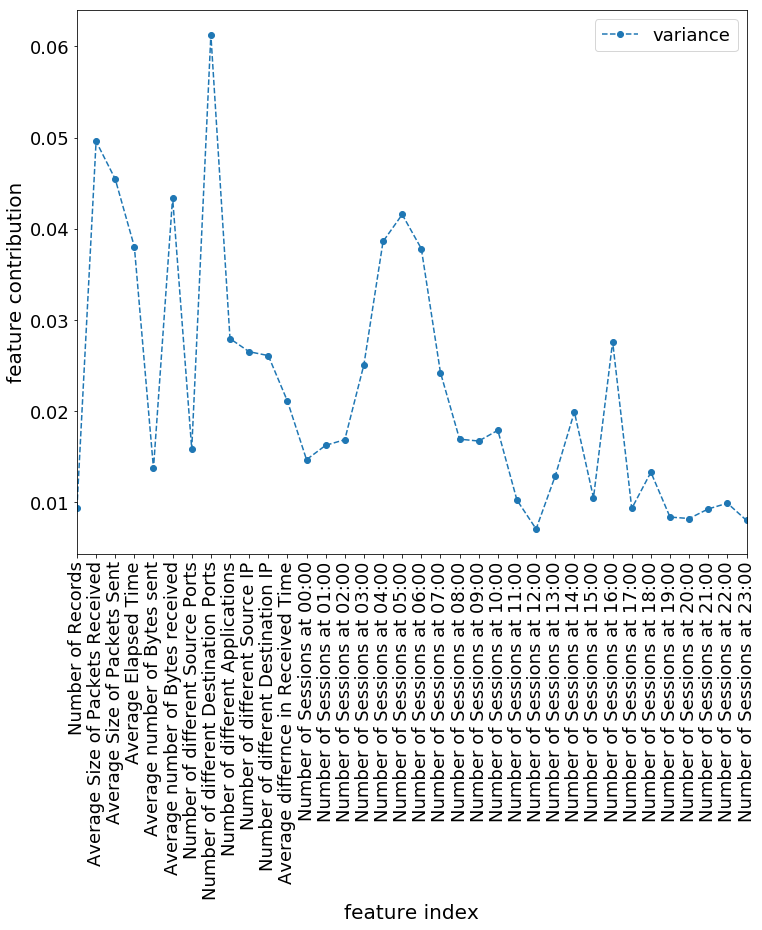

In [220]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-4

In [221]:
pca=PCA(n_components=4,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_4=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240442                          0.021149   
PC-2           0.035895                         -0.087901   
PC-3          -0.027244                          0.549538   
PC-4           0.124586                          0.095652   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.013889             -0.003442   
PC-2                     -0.079105             -0.015431   
PC-3                      0.534553              0.017832   
PC-4                      0.099401              0.009968   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.008617                          0.022419   
PC-2                     -0.048396                         -0.084018   
PC-3                      0.292459                          0.509414   
PC-4                      0.059609                          0.083726   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.225722                               0.065336   
PC-2                         -0.147763                              -0.100701   
PC-3                         -0.021024                              -0.012955   
PC-4                          0.012749                              -0.106113   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.164688                       0.099022   
PC-2                         -0.151292                      -0.089952   
PC-3                          0.077746                       0.060132   
PC-4                         -0.215064                      -0.215013   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.188601                           -0.060239   
PC-2                           -0.167330                            0.081503   
PC-3                            0.017277                           -0.059573   
PC-4                           -0.187932                            0.155386   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.185825                     0.174754   
PC-2                     0.273880                     0.268282   
PC-3                     0.018988                     0.010044   
PC-4                     0.172437                     0.226791   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.177771                     0.175937   
PC-2                     0.197054                    -0.113936   
PC-3                    -0.008636                    -0.065003   
PC-4                     0.284319                     0.310714   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.142786                     0.138339   
PC-2                    -0.263795                    -0.286618   
PC-3                    -0.103240                    -0.107696   
PC-4                     0.306708                     0.308638   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.131112                     0.138025   
PC-2                    -0.297394                    -0.285284   
PC-3                    -0.110751                    -0.081310   
PC-4                     0.264996                     0.128341   

      Number of Sessions at 08:00  Number of Sessions at 09:00  \
PC-1                     0.147469                     0.157689   
PC-2                    -0.262127                    -0.230630   
PC-3                    -0.051390                    -0.036258   
PC-4                    -0.032850                    -0.136788   

      Number of Sessions at 10:00  Number of Sessions at 11:00  \
PC-1                     0.158981                     0.204409   
PC-2                    -0.182954                     0.058283   
PC-3        

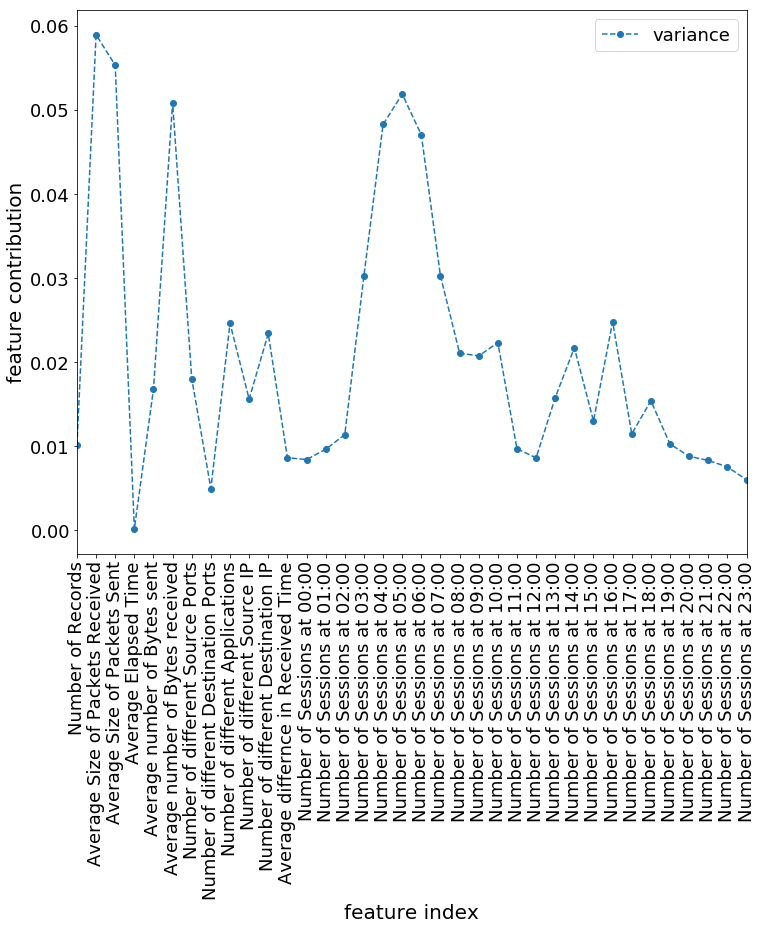

In [222]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using  PCA-3

In [223]:
pca=PCA(n_components=3,random_state=0,whiten=True,svd_solver='arpack')
X_pca_3=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3'])
m

Number of Records  Average Size of Packets Received  \
PC-1           0.240442                          0.021149   
PC-2           0.035895                         -0.087901   
PC-3          -0.027244                          0.549538   

      Average Size of Packets Sent  Average Elapsed Time  \
PC-1                      0.013889             -0.003442   
PC-2                     -0.079105             -0.015431   
PC-3                      0.534553              0.017832   

      Average number of Bytes sent  Average number of Bytes received  \
PC-1                      0.008617                          0.022419   
PC-2                     -0.048396                         -0.084018   
PC-3                      0.292459                          0.509414   

      Number of different Source Ports  Number of different Destination Ports  \
PC-1                          0.225722                               0.065336   
PC-2                         -0.147763                              -0.100701   
PC-3                         -0.021024                              -0.012955   

      Number of different Applications  Number of different Source IP  \
PC-1                          0.164688                       0.099022   
PC-2                         -0.151292                      -0.089952   
PC-3                          0.077746                       0.060132   

      Number of different Destination IP  Average differnce in Received Time  \
PC-1                            0.188601                           -0.060239   
PC-2                           -0.167330                            0.081503   
PC-3                            0.017277                           -0.059573   

      Number of Sessions at 00:00  Number of Sessions at 01:00  \
PC-1                     0.185825                     0.174754   
PC-2                     0.273880                     0.268282   
PC-3                     0.018988                     0.010044   

      Number of Sessions at 02:00  Number of Sessions at 03:00  \
PC-1                     0.177771                     0.175937   
PC-2                     0.197054                    -0.113936   
PC-3                    -0.008636                    -0.065003   

      Number of Sessions at 04:00  Number of Sessions at 05:00  \
PC-1                     0.142786                     0.138339   
PC-2                    -0.263795                    -0.286618   
PC-3                    -0.103240                    -0.107696   

      Number of Sessions at 06:00  Number of Sessions at 07:00  \
PC-1                     0.131112                     0.138025   
PC-2                    -0.297394                    -0.285284   
PC-3                    -0.110751                    -0.081310   

      Number of Sessions at 08:00  Number of Sessions at 09:00  \
PC-1                     0.147469                     0.157689   
PC-2                    -0.262127                    -0.230630   
PC-3                    -0.051390                    -0.036258   

      Number of Sessions at 10:00  Number of Sessions at 11:00  \
PC-1                     0.158981                     0.204409   
PC-2                    -0.182954                     0.058283   
PC-3                    -0.010662                     0.008103   

      Number of Sessions at 12:00  Number of Sessions at 13:00  \
PC-1                     0.204236                     0.196907   
PC-2                     0.086339                    -0.017462   
PC-3                     0.011773                     0.002445   

      Number of Sessions at 14:00  Number of Sessions at 15:00  \
PC-1                     0.192626                     0.209406   
PC-2                     0.027247                     0.095738   
PC-3                     0.013536                     0.014565   

      Number of Sessions at 16:00  Number of Sessions at 17:00  \
PC-1                     0.166099                     0.188577   
PC-2                    -0.057211       

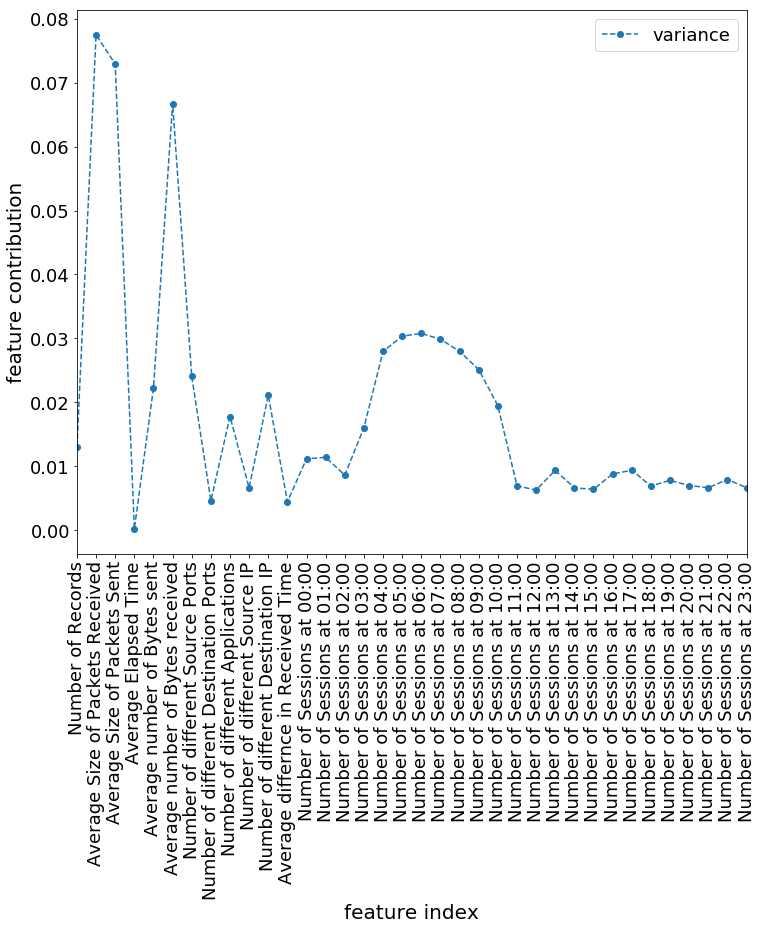

In [224]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

In [225]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')